### Mandy's Fruit Identification Project



Classification metrics:

    Print the accuracy measure on the testing data.
    Print the confusion matrix of the testing data.

Submit Your GitHub Link Here :

Copy and paste your GitHub link in the field below, then click Submit. 

In [1]:
import pandas as pd
import livelossplot
import keras
from keras import Sequential

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [2]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Fitting images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255,)

Note - the assignment states to divide your dataset here into training and testing, however in this dataset each training and testing already have their own folders for pulling in with a 75% training and 25% testing.

## About the dataset
The dataset Fruits 360 has a Total number of images: 90483. It has 131 classes (also note there is a multiple fruit set that I haven't used in my modelling at this time)

In [4]:
# Locate and assign Training Set - noted that I must switch the slash direction for syntax within paths
training_set = train_datagen.flow_from_directory('C:/Users/hyppi/OneDrive/Bootcamp/assessments Python/Module8 - CNN and RNN/fruits-360_dataset/fruits-360/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 67692 images belonging to 131 classes.


In [5]:
test_set = test_datagen.flow_from_directory('C:/Users/hyppi/OneDrive/Bootcamp/assessments Python/Module8 - CNN and RNN/fruits-360_dataset/fruits-360/Test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 22688 images belonging to 131 classes.


In [6]:
x_test,  y_test = test_set.next()

In [7]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
#Next to train our model

# Initialising the CNN
fruit_model = Sequential()

# Step 1 - Convolution
fruit_model.add(Conv2D(16, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# Step 2 - Pooling
fruit_model.add(MaxPooling2D(pool_size = (2, 2)))

# Another convolutional layer
fruit_model.add(Conv2D(32, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# Another pooling layer with 2x2
fruit_model.add(MaxPooling2D(pool_size = (2, 2)))

# Two more 2D Convolutional layers with 64 unitix and size 2x2 and relu
fruit_model.add(Conv2D(64, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))
fruit_model.add(Conv2D(64, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# Another pooling layer with 2x2
fruit_model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a dropout layer with 0.3  rate
fruit_model.add(Dropout(0.3))

# Step 3 - Flattening
fruit_model.add(Flatten())

# Step 4 - Full connection ANN layers
# Add fully connected layer with 150 units with ReLU and then a dropout layer with a 0.4 rate
fruit_model.add(Dense(units=150, activation='relu'))

#another dropout layer with 0.5 rate
fruit_model.add(Dropout(rate=0.4))

# NOTE - I thought that the output layer was supposed to be the number of classes (131 in this dataset)  however the assignment states to use 81 units - I will inquire on this at next class

# Final Output layer fully connected with 81 units and softmax activation.
fruit_model.add(Dense(units=131, activation='softmax'))

In [9]:
# Compiling the CNN
fruit_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
class_names = test_set.class_indices.keys()
print(class_names)

dict_keys(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracu

In [11]:
fruit_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 99, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)       



## Training to classify fruit

### Here I recieved the error ValueError: The `batch_size` argument must not be specified when using a generator or Sequence as an input.

###  This led into a different value error saying that the expected size for my dense_2 output layer of 131, was instead showing as a shape of 1, 

### This led down a bit of a rabbit hole trying to find the solution as essentially it seemed to be binary but our data was catagorical, at first the thought was we might need to one-hot or to_catagorical

### In the end however of looking one more time I realized that the example notebook pulled in class_mode of binary and I had missed changing that to categorical, once change it then  worked properly.


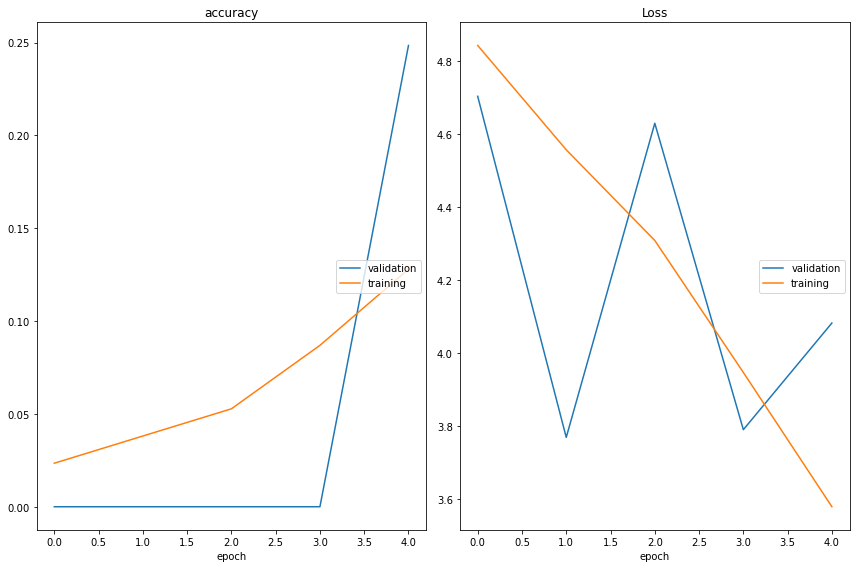

accuracy
	validation       	 (min:    0.000, max:    0.248, cur:    0.248)
	training         	 (min:    0.023, max:    0.128, cur:    0.128)
Loss
	validation       	 (min:    3.769, max:    4.704, cur:    4.083)
	training         	 (min:    3.579, max:    4.843, cur:    3.579)
Epoch 6/30
31/32 [============================>.] - ETA: 0s - loss: 3.2591 - accuracy: 0.1663

In [12]:
from livelossplot import PlotLossesKeras

fruit_model.fit(training_set,
               steps_per_epoch = 32,
               epochs = 30,
               validation_data=(test_set),
               callbacks=[PlotLossesKeras()],
               validation_steps = 20,
               verbose=1)

In [ ]:
#pull the loss and accuracy from the model
loss, accuracy = fruit_model.evaluate(test_set)

709/709 [==============================] - 38s 53ms/step


In [ ]:
loss

0.0028678684029728174

In [ ]:
accuracy

0.8484220504760742

In [ ]:

#Make predictions on the test data with the trained model
y_prediction = np.argmax(fruit_model.predict(x_test), axis=1)
y_test1 = np.argmax(y_test, axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\hyppi\anaconda3\envs\Tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-f01da78b904d>", line 3, in <module>
    y_test = np.argmax(y_test, axis=1)
  File "<__array_function__ internals>", line 6, in argmax
  File "c:\Users\hyppi\anaconda3\envs\Tensor\lib\site-packages\numpy\core\fromnumeric.py", line 1188, in argmax
    return _wrapfunc(a, 'argmax', axis=axis, out=out)
  File "c:\Users\hyppi\anaconda3\envs\Tensor\lib\site-packages\numpy\core\fromnumeric.py", line 58, in _wrapfunc
    return bound(*args, **kwds)
numpy.AxisError: axis 1 is out of bounds for array of dimension 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\hyppi\anaconda3\envs\Tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._rende

In [ ]:
y_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
y_prediction

array([96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96],
      dtype=int64)

In [ ]:
confusion_matrix = confusion_matrix(list(y_test1), list(y_prediction))

In [ ]:
confusion_matrix

array([[ 0, 32],
       [ 0,  0]], dtype=int64)

## The result is showing for me  at 86% accuracy which feels pretty good with 131 classes of fruits and vegetables that might have similar appearance.